# Fantasy Premier League (FPL) 

This project will predict the next game's performance of a player based on a 3 game average. We will predict players that are regular starters only, as some players have few apperances. 


We will then conclude then use PCA to cluster players. 

The data has been sourced from a kaggle dataset: https://www.kaggle.com/idoyo92/epl-stats-20192020?select=players_1920.csv



# Load Standard Imports and Data

The data consists of data of each player per game.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno #I use this to check missing values within the data.
import pandas.plotting as pdp #use this to observe any correlations
 


data = pd.read_csv('players_1920.csv')
data.head()

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team
0,1,0,0,1,0,0.1,534,37,1,0,...,0,1,0,0,0,45,False,0,Aaron Connolly,Brighton
1,2,0,0,1,0,0.3,534,43,1,0,...,21,1,10589,13500,2911,45,True,0,Aaron Connolly,Brighton
2,3,0,0,1,0,4.8,534,58,0,0,...,18,1,8090,11749,3659,45,False,0,Aaron Connolly,Brighton
3,4,0,0,2,0,0.6,534,63,1,0,...,0,1,8437,13439,5002,45,False,0,Aaron Connolly,Brighton
4,5,0,3,53,1,23.8,534,72,0,2,...,107,13,2156,5952,3796,45,True,0,Aaron Connolly,Brighton


#  Explore Data

###### What is our data, what are the features? 

In [58]:
data.columns

Index(['Unnamed: 0', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team'],
      dtype='object')

###### Each feature consists of the following: 

- Unnamed: 0 is just the index of each row - <i>lets drop this</i>
- Assists: Number of Assists a player has had within the game, ranges from 0 to 3.
- Bonus: Bonus points awarded by FPL, ranges from 0 to 3.
- BPS: Fantasy Bonus point system
- clean_sheets: clean sheet within the game, 0 or 1. 
- Creativity: FPL measure, creativity assesses player performance in terms of producing goalscoring opportunities for others. It can be used as a guide to identify the players most likely to supply assists.
- element: PlayerID
- fixture: Game ID
- goals_conceded: Goal conceded by player while playing in team
- goals_scored: Goal scored by player, ranges from 0 to 3.
- ict_index: Index by FPL
- influence: FPL measure, this evaluates the degree to which that player has made an impact on a single match or throughout the season.
- kickoff_time: Kick off time of game
- minutes: Minutes played by player during game
- opponent_team: Player Opposition team
- own_goals: Player scored an own goal
- penalties_missed: Player missed a Penalities
- penalties_saved: Goal keeper saved a penalty, 
- round: game week round is is, range form 1 to 29 
- saves: Number of saves by player
- selected: How many FPL users selected
- team_a_score
- team_h_score
- threat: FPL measure, producing a value that examines a player's threat on goal. It gauges individuals most likely to score goals.
- total_points
- transfers_balance
- transfers_in
- transfers_out
- value
- was_home: Home fixure of away, True or False
- red_cards: Red card given during game, 0 or 1
- yellow_cards: Number of yellow cards, 0 or 1
- full: Name player
- team: Football club

In [59]:
data['penalties_saved'].value_counts()

0    16485
1       12
2        1
Name: penalties_saved, dtype: int64

######  Explore Nans or missing data

In [60]:
data[data.isnull().any(axis=1)] # no Nans

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team


In [61]:
data.apply(lambda row: row.astype(str).str.contains('Nan').any(), axis=1).value_counts() #search for 'Missing' values

False    16498
dtype: int64

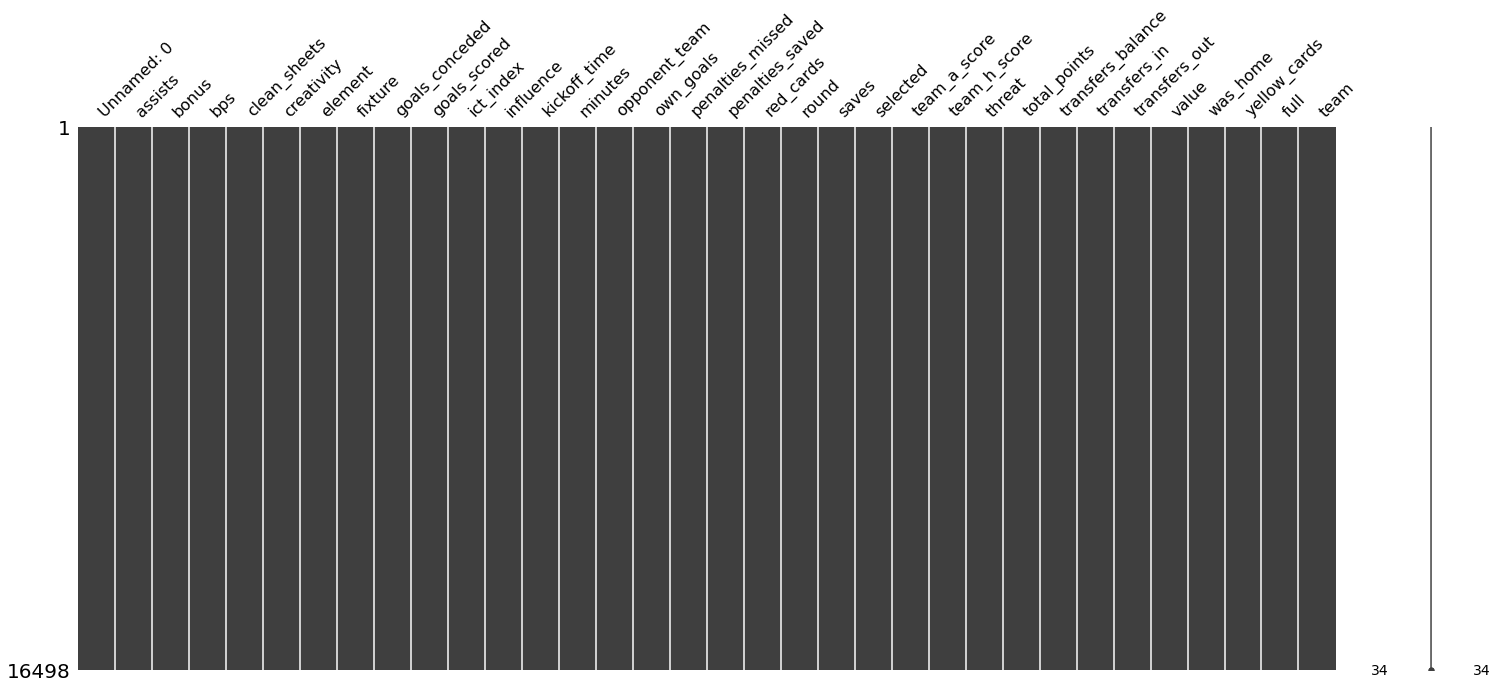

In [62]:
msno.matrix(data) #visually observe the missing values within data

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16498 entries, 0 to 16497
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16498 non-null  int64  
 1   assists            16498 non-null  int64  
 2   bonus              16498 non-null  int64  
 3   bps                16498 non-null  int64  
 4   clean_sheets       16498 non-null  int64  
 5   creativity         16498 non-null  float64
 6   element            16498 non-null  int64  
 7   fixture            16498 non-null  int64  
 8   goals_conceded     16498 non-null  int64  
 9   goals_scored       16498 non-null  int64  
 10  ict_index          16498 non-null  float64
 11  influence          16498 non-null  float64
 12  kickoff_time       16498 non-null  object 
 13  minutes            16498 non-null  int64  
 14  opponent_team      16498 non-null  object 
 15  own_goals          16498 non-null  int64  
 16  penalties_missed   164

Drop the 'Unnamed: 0' column, inplace=True

In [64]:
data.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)
data

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team
0,0,0,1,0,0.1,534,37,1,0,0.0,...,0,1,0,0,0,45,False,0,Aaron Connolly,Brighton
1,0,0,1,0,0.3,534,43,1,0,2.2,...,21,1,10589,13500,2911,45,True,0,Aaron Connolly,Brighton
2,0,0,1,0,4.8,534,58,0,0,2.5,...,18,1,8090,11749,3659,45,False,0,Aaron Connolly,Brighton
3,0,0,2,0,0.6,534,63,1,0,0.1,...,0,1,8437,13439,5002,45,False,0,Aaron Connolly,Brighton
4,0,3,53,1,23.8,534,72,0,2,20.1,...,107,13,2156,5952,3796,45,True,0,Aaron Connolly,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16493,0,0,0,0,0.0,27,231,0,0,0.0,...,0,0,-1748,340,2088,43,True,0,?rjan Nyland,Aston Villa
16494,0,0,0,0,0.0,27,241,0,0,0.0,...,0,0,-792,645,1437,43,False,0,?rjan Nyland,Aston Villa
16495,0,0,0,0,0.0,27,252,0,0,0.0,...,0,0,-753,223,976,43,True,0,?rjan Nyland,Aston Villa
16496,0,0,0,0,0.0,27,269,0,0,0.0,...,0,0,-701,138,839,43,False,0,?rjan Nyland,Aston Villa


We have a full dataset with no missing values or nans. 

#### Plot a Correlation Matrix 
Below plot is inspired by: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec


In [65]:
# pip install heatmapz 

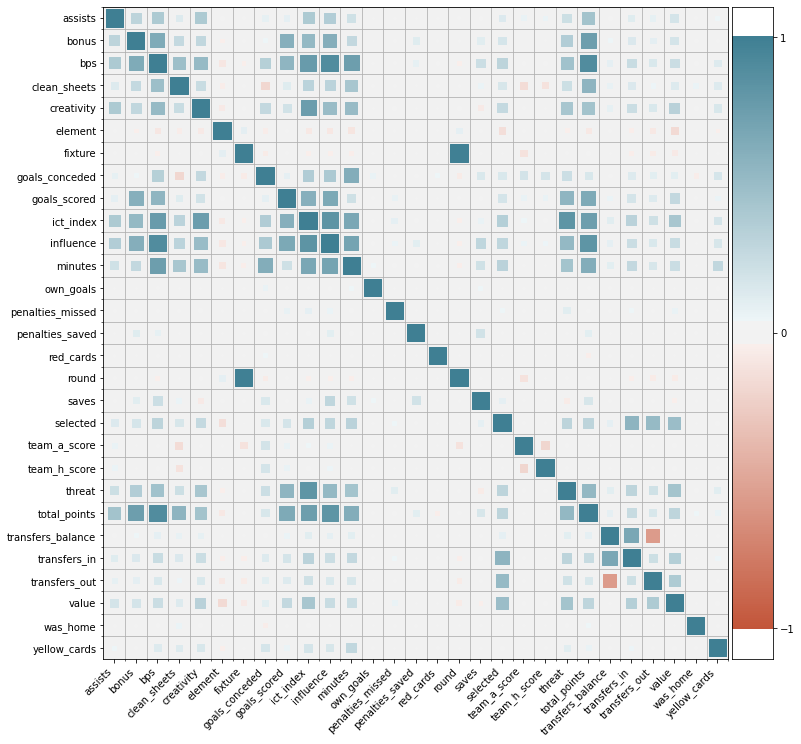

In [66]:
from heatmap import corrplot
plt.figure(figsize= (12, 12))
corrplot(data.corr(), size_scale= 300)

In [120]:
data.groupby(['full']).mean()['minutes'].sort_values(ascending= True).head(50) #we have so many players that are not playing at all

full
Marko Arnautovic                 0.0
Daniel Amartey                   0.0
Danilo Luiz da Silva             0.0
Kayne Ramsay                     0.0
Danny Ward                       0.0
David Brooks                     0.0
David Button                     0.0
Rafael Camacho                   0.0
Rachid Ghezzal                   0.0
Kelland Watts                    0.0
Davide Zappacosta                0.0
Vincent Janssen                  0.0
Simon Mignolet                   0.0
Pontus Dahlberg                  0.0
Philip Heise                     0.0
Eldin Jakupovic                  0.0
Joseph Anang                     0.0
Emiliano Mart?nez                0.0
Jose Luis Mato Sanmart?n         0.0
Karl Darlow                      0.0
Rhian Brewster                   0.0
Wesley Hoedt                     0.0
Ken Sema                         0.0
Brandon Austin                   0.0
Bruno Andr? Cavaco Jordao        0.0
Robert Elliot                    0.0
Laurent Koscielny                

# TO DO: remove all players that are false (i.e. if mean minutes played ==0 then remove player from dataset

In [124]:
data.groupby(['full']).mean()['minutes'] == 0.0 

full
?aglar S?y?nc?     False
?rjan Nyland       False
Aaron Connolly     False
Aaron Cresswell    False
Aaron Lennon       False
                   ...  
Yan Valery         False
Yerry Mina         False
Yoshinori Muto     False
Youri Tielemans    False
Yves Bissouma      False
Name: minutes, Length: 628, dtype: bool

In [103]:

filt = data.groupby(['full']).mean()['minutes'] > 45 #boolean values of all names that have player more than 60 mins per game
# data.loc[data['full'] == filt] 
filt.value_counts()

False    403
True     225
Name: minutes, dtype: int64

In [68]:
forms = ['total_points','assists','goals_scored','ict_index','threat','creativity','influence','saves','value','minutes','goals_conceded','clean_sheets','ppm']
form2_means = regulars.groupby(['full'])[forms]

NameError: name 'regulars' is not defined

<Figure size 1800x720 with 0 Axes>

In [14]:
data.shape

(16498, 34)

In [115]:
data

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team
0,0,0,1,0,0.1,534,37,1,0,0.0,...,0,1,0,0,0,45,False,0,Aaron Connolly,Brighton
1,0,0,1,0,0.3,534,43,1,0,2.2,...,21,1,10589,13500,2911,45,True,0,Aaron Connolly,Brighton
2,0,0,1,0,4.8,534,58,0,0,2.5,...,18,1,8090,11749,3659,45,False,0,Aaron Connolly,Brighton
3,0,0,2,0,0.6,534,63,1,0,0.1,...,0,1,8437,13439,5002,45,False,0,Aaron Connolly,Brighton
4,0,3,53,1,23.8,534,72,0,2,20.1,...,107,13,2156,5952,3796,45,True,0,Aaron Connolly,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16493,0,0,0,0,0.0,27,231,0,0,0.0,...,0,0,-1748,340,2088,43,True,0,?rjan Nyland,Aston Villa
16494,0,0,0,0,0.0,27,241,0,0,0.0,...,0,0,-792,645,1437,43,False,0,?rjan Nyland,Aston Villa
16495,0,0,0,0,0.0,27,252,0,0,0.0,...,0,0,-753,223,976,43,True,0,?rjan Nyland,Aston Villa
16496,0,0,0,0,0.0,27,269,0,0,0.0,...,0,0,-701,138,839,43,False,0,?rjan Nyland,Aston Villa


In [82]:
data.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards
count,16498.000000,16498.000000,16498.000000,16498.000000,16498.000000,16498.000000,16498.000000,16498.000000,16498.000000,16498.000000,...,1.649800e+04,16498.000000,16498.000000,16498.000000,16498.000000,1.649800e+04,1.649800e+04,1.649800e+04,16498.000000,16498.000000
mean,0.041278,0.111529,6.305128,0.103406,5.090229,288.756152,149.169596,0.522730,0.046006,1.880155,...,1.835657e+05,1.203419,1.508728,5.925930,1.405746,2.835156e+02,1.185573e+04,1.157276e+04,52.099709,0.061401
std,0.215326,0.499305,9.789839,0.304498,11.122974,167.613261,83.454544,0.960011,0.233062,3.160537,...,4.307115e+05,1.197159,1.186067,14.464475,2.512501,4.998745e+04,4.262678e+04,3.737934e+04,12.091168,0.240072
min,0.000000,0.000000,-12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-6.000000,-1.245778e+06,0.000000e+00,0.000000e+00,39.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,77.000000,0.000000,0.000000,0.000000,...,7.915500e+03,0.000000,1.000000,0.000000,0.000000,-1.776750e+03,7.400000e+01,2.352500e+02,44.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,287.000000,151.000000,0.000000,0.000000,0.000000,...,2.958250e+04,1.000000,1.000000,0.000000,0.000000,-1.540000e+02,5.280000e+02,1.360000e+03,49.000000,0.000000
75%,0.000000,0.000000,11.000000,0.000000,3.300000,433.000000,222.000000,1.000000,0.000000,2.700000,...,1.352898e+05,2.000000,2.000000,3.750000,2.000000,3.800000e+01,4.375000e+03,7.453000e+03,55.000000,0.000000
max,3.000000,3.000000,90.000000,1.000000,127.700000,631.000000,290.000000,9.000000,3.000000,26.800000,...,3.983614e+06,9.000000,8.000000,176.000000,24.000000,9.849500e+05,1.030761e+06,1.263230e+06,128.000000,1.000000


In [ ]:
#Preprocessing 

data.drop('Unnamed: 0', axis=1, inplace= True)
data

# Can I use PCA?

### Reduce dimensions and see what the clusters of teams look like? Maybe try condensing the teams down into groups and sum/average columns to clusters? 

### SVM Classifier to predict win, loss or draw

In [38]:
columns = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team']

for name in columns:
    print(name)

assists
bonus
bps
clean_sheets
creativity
element
fixture
goals_conceded
goals_scored
ict_index
influence
kickoff_time
minutes
opponent_team
own_goals
penalties_missed
penalties_saved
red_cards
round
saves
selected
team_a_score
team_h_score
threat
total_points
transfers_balance
transfers_in
transfers_out
value
was_home
yellow_cards
full
team
